In [1]:
import tensorflow as tf
import numpy as np
rnd = np.random

In [14]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [15]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [16]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rnd.randn(), name="weight")
b = tf.Variable(rnd.randn(), name="bias")

In [17]:
def linear_regression(x):
  return W*x+b

In [18]:
def mean_square(y_pred,y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [19]:
optimizer = tf.optimizers.SGD(learning_rate)

In [20]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [21]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.566992, W: -0.006039, b: 2.625592
step: 100, loss: 0.477847, W: 0.023448, b: 2.416542
step: 150, loss: 0.407938, W: 0.049561, b: 2.231413
step: 200, loss: 0.353113, W: 0.072686, b: 2.067471
step: 250, loss: 0.310119, W: 0.093164, b: 1.922290
step: 300, loss: 0.276401, W: 0.111299, b: 1.793722
step: 350, loss: 0.249959, W: 0.127358, b: 1.679867
step: 400, loss: 0.229223, W: 0.141580, b: 1.579042
step: 450, loss: 0.212961, W: 0.154174, b: 1.489754
step: 500, loss: 0.200208, W: 0.165327, b: 1.410685
step: 550, loss: 0.190207, W: 0.175204, b: 1.340663
step: 600, loss: 0.182363, W: 0.183950, b: 1.278654
step: 650, loss: 0.176212, W: 0.191696, b: 1.223742
step: 700, loss: 0.171389, W: 0.198555, b: 1.175114
step: 750, loss: 0.167606, W: 0.204629, b: 1.132050
step: 800, loss: 0.164640, W: 0.210008, b: 1.093915
step: 850, loss: 0.162313, W: 0.214772, b: 1.060143
step: 900, loss: 0.160489, W: 0.218990, b: 1.030236
step: 950, loss: 0.159058, W: 0.222726, b: 1.003752
step: 1000, 

In [22]:
import matplotlib.pyplot as plt

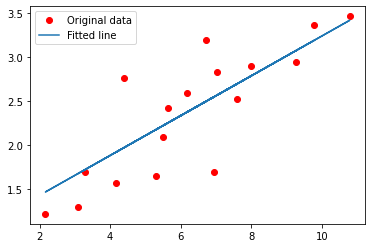

In [23]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()